In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
jpg = '../input/train-jpg/train_8.jpg'
tif = '../input/train-tif/train_8.tif'

In [6]:
img = cv2.imread(jpg)

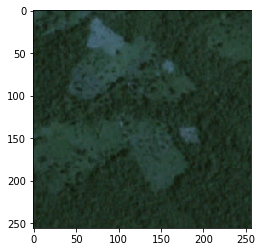

In [7]:
plt.imshow(img)

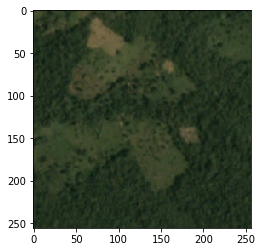

In [10]:
plt.imshow(img[:,:,::-1])

In [52]:
from skimage import io
from skimage.transform import resize

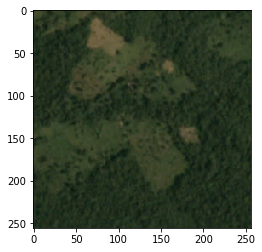

In [51]:
plt.imshow(io.imread(jpg))

(256, 256, 3)
(600, 600, 3)


/Users/dingran/anaconda/envs/py35tf/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


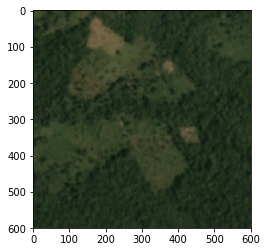

In [56]:
img2 = io.imread(jpg)
print(img2.shape)
img2 = resize(img2, (600, 600))
print(img2.shape)
plt.imshow(img2)

In [13]:
tifimg = io.imread(tif)

In [14]:
tifimg.shape

(256, 256, 4)

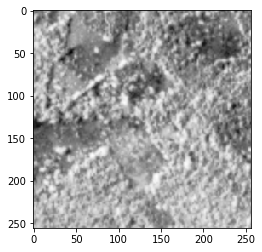

In [29]:
plt.imshow(tifimg[:,:,3], 'Greys')

In [30]:
NVDI = (tifimg[:,:,3]-tifimg[:,:,0])/(tifimg[:,:,3]+tifimg[:,:,0])

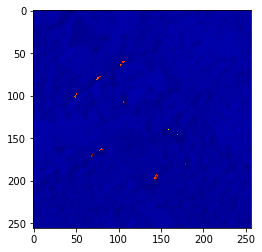

In [33]:
plt.imshow(NVDI, cmap='jet')

In [45]:
import pickle
import pandas as pd
import os
import numpy as np

In [42]:
with open('../output/keras_pred1.pkl', 'rb') as f:
    test_filenames, ytest = pickle.load(f)

In [43]:
data_dir = '../input'

train_label = pd.read_csv(os.path.join(data_dir, 'train_v2.csv'))
labels_str = 'agriculture, artisinal_mine, bare_ground, blooming, blow_down, clear, cloudy, conventional_mine, cultivation, habitation, haze, partly_cloudy, primary, road, selective_logging, slash_burn, water'
labels = labels_str.split(', ')
label_map = {x: labels.index(x) for x in labels}

In [46]:
def map_predictions(predictions, labels_map, thresholds=np.ones(17)*0.5):
    predictions_labels = []
    for prediction in predictions:
        labels = [labels_map[i] for i, value in enumerate(prediction) if value > thresholds[i]]
        predictions_labels.append(labels)

    return predictions_labels

In [47]:
predicted_labels = map_predictions(ytest, labels)
predicted_labels_str = [' '.join(x) for x in predicted_labels]

In [48]:
df = pd.DataFrame({'image_name': test_filenames, 'tags': predicted_labels_str})
df.to_csv('../output/keras_pred1_thresh0p5.csv', index=False)